In [1]:
# importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

sns.set_style("whitegrid")
sns.set_context("notebook") 

# Importing the preocessed dataset

In [2]:
input_path = '/kaggle/input/mn-traffic-processed/'
df = pd.read_csv(input_path + 'processed_data.csv')
df.head()

,station_id,dir_of_travel,lane_of_travel,date,hour,volume,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches),wdir,wspd,pres,is_holiday
0,26,1,1,2019-01-01,1,47,11.0,0.0,0.0,0.0,0.0,305.0,15.3,1031.20,1
1,26,1,1,2019-01-02,1,59,26.0,2.0,0.0,0.0,0.0,207.0,17.6,1017.70,0
2,26,1,1,2019-01-03,1,79,41.0,20.0,0.0,0.0,0.0,223.0,13.8,1013.15,0
3,26,1,1,2019-01-04,1,74,47.0,28.0,0.0,0.0,0.0,239.0,10.0,1008.60,0
4,26,1,1,2019-01-05,1,97,47.0,27.0,0.0,0.0,0.0,286.0,17.2,1014.10,0


In [3]:
df['station_id'].unique()

array([   26,    27,    28,    30,    31,    32,    33,    34,    35,
          39,    40,    41,    42,    43,    44,    45,    47,    48,
          49,    51,   103,   110,   149,   164,   175,   187,   198,
         199,   204,   209,   210,   211,   214,   218,   219,   220,
         221,   222,   225,   228,   229,   230,   231,   232,   233,
         275,   301,   303,   305,   335,   336,   342,   365,   386,
         388,   389,   405,   410,   420,   425,   458,   460,   464,
         468,   495,   770,   816,   949,  1028,  1117,  1190,  1710,
        1732,  1940,  1949,  1977,  2250,  2348,  2450,  2616,  2685,
        2811,  3371,  3467,  3581,  3760,  3790,  3801,  4126,  4172,
        4402,  4720,  4741,  4820,  4910,  5120,  5262,  5292,  5424,
        5506,  5794,  5943,  5984,  6067,  6224,  6234,  6269,  6461,
        6725,  6734,  6737,  6744,  9102,  9110,  9200,  9303,  9556,
        9852, 10069, 10205, 10206, 10310, 10338, 10390, 10398, 10730,
       10794, 10800,

In [4]:
df['station_id'].nunique()

155

In [5]:
stations_needed = [10390, 11517, 11236, 70413, 11228, 11196, 11205, 10310, 11191, 42507, 11238, 10730, 10794, 10800, 10808, 11179, 11280, 10069, 11726, 11510, 11283, 11516, 10919, 10899, 11464, 11273, 10840, 11747, 11749, 10830, 10206, 10205, 405, 336, 425, 389, 301, 303, 464, 10398]
len(stations_needed)

40

In [6]:
mask = df['station_id'].isin(stations_needed)
df.loc[mask, 'dir_of_travel'].value_counts()

dir_of_travel
3    2313552
7    2294592
1    1857816
5    1787688
Name: count, dtype: int64

In [7]:
df.loc[mask, 'lane_of_travel'].value_counts()

lane_of_travel
1    2839200
2    2804136
3    1663704
4     806352
5     140256
Name: count, dtype: int64

In [8]:
df[mask].shape

(8253648, 15)

In [9]:
df.shape

(21409776, 15)

In [10]:
grouped_station = df.groupby('station_id')['date'].min()

In [11]:
# A need to remove some stations, not enough df for them
stations_to_remove = list(grouped_station[grouped_station>='2021-01-01'].index)
mask_stations = df['station_id'].isin(stations_to_remove)
df = df[~mask_stations]
df.shape

(19738896, 15)

In [12]:
grouped_station_dir_lane = df.groupby(['station_id', 'dir_of_travel', 'lane_of_travel'])['date'].min()
grouped_station_dir_lane.sort_values(ascending=False)

station_id  dir_of_travel  lane_of_travel
45          3              2                 2023-01-01
            7              2                 2023-01-01
6461        3              3                 2022-10-01
            7              3                 2022-10-01
10398       7              3                 2022-03-01
                                                ...    
365         1              1                 2019-01-01
233         5              1                 2019-01-01
            1              1                 2019-01-01
232         1              1                 2019-01-01
26          1              1                 2019-01-01
Name: date, Length: 525, dtype: object

In [13]:
# Same problem as before
unique_id_to_remove = list(grouped_station_dir_lane[grouped_station_dir_lane>='2021-01-01'].index)
df_ids_to_remove = pd.DataFrame(unique_id_to_remove, columns=['station_id', 'dir_of_travel', 'lane_of_travel'])
df = pd.merge(df, df_ids_to_remove, on=['station_id', 'dir_of_travel', 'lane_of_travel'], how='left', indicator=True)
df = df[df['_merge']=='left_only']
df.drop('_merge', axis=1, inplace=True)
df.shape

(19613352, 15)

In [14]:
# Choose the stations within Minnepolis/St. Paul to avoid any RAM problems
mask_stations = df['station_id'].isin(stations_needed)
df = df[mask_stations]
df.shape

(8167560, 15)

In [15]:
mask = df['hour']==24
df[mask].head()

,station_id,dir_of_travel,lane_of_travel,date,hour,volume,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches),wdir,wspd,pres,is_holiday
19141263,301,3,1,2020-01-02,24,315,37.0,31.0,0.00,0.0,5.0,272.0,19.1,1000.8,0
19141264,301,3,1,2020-01-03,24,385,36.0,24.0,0.00,0.0,4.0,238.0,12.6,1011.7,0
19141265,301,3,1,2020-01-04,24,404,30.0,24.0,0.00,0.0,4.0,226.0,15.9,1018.9,0
19141266,301,3,1,2020-01-05,24,221,38.0,24.0,0.01,0.0,4.0,274.0,28.5,1014.9,0
19141267,301,3,1,2020-01-06,24,279,36.0,22.0,0.00,0.0,3.0,231.0,18.2,1019.3,0


In [16]:
# Creating the day of the week, month, and year columns
df.loc[mask, 'hour'] = 0
df.loc[mask, 'date'] = pd.to_datetime(df.loc[mask, 'date']) + pd.DateOffset(days=1)

df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek
df['day'] = pd.to_datetime(df['date']).dt.day
df['week'] = pd.to_datetime(df['date']).dt.isocalendar().week
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

df.head()

,station_id,dir_of_travel,lane_of_travel,date,hour,volume,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches),wdir,wspd,pres,is_holiday,day_of_week,day,week,month,year
224821,301,3,1,2020-01-02,1,135,37.0,31.0,0.00,0.0,5.0,272.0,19.1,1000.8,0,3,2,1,1,2020
224822,301,3,1,2020-01-03,1,164,36.0,24.0,0.00,0.0,4.0,238.0,12.6,1011.7,0,4,3,1,1,2020
224823,301,3,1,2020-01-04,1,291,30.0,24.0,0.00,0.0,4.0,226.0,15.9,1018.9,0,5,4,1,1,2020
224824,301,3,1,2020-01-05,1,281,38.0,24.0,0.01,0.0,4.0,274.0,28.5,1014.9,0,6,5,1,1,2020
224825,301,3,1,2020-01-06,1,146,36.0,22.0,0.00,0.0,3.0,231.0,18.2,1019.3,0,0,6,2,1,2020


In [17]:
# Prevent overload in RAM
years_remove = [2019]
mask = df['year'].isin(years_remove)
df = df[~mask]
df.shape

(8098256, 20)

In [18]:
df['station_id'].nunique()

40

In [19]:
# Calculate the final number of features
df['station_id'].nunique() + df['dir_of_travel'].nunique() + df['lane_of_travel'].nunique() + 12

61

In [20]:
mask = df['hour']==0
df[mask].head()

,station_id,dir_of_travel,lane_of_travel,date,hour,volume,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches),wdir,wspd,pres,is_holiday,day_of_week,day,week,month,year
19141263,301,3,1,2020-01-03 00:00:00,0,315,37.0,31.0,0.00,0.0,5.0,272.0,19.1,1000.8,0,4,3,1,1,2020
19141264,301,3,1,2020-01-04 00:00:00,0,385,36.0,24.0,0.00,0.0,4.0,238.0,12.6,1011.7,0,5,4,1,1,2020
19141265,301,3,1,2020-01-05 00:00:00,0,404,30.0,24.0,0.00,0.0,4.0,226.0,15.9,1018.9,0,6,5,1,1,2020
19141266,301,3,1,2020-01-06 00:00:00,0,221,38.0,24.0,0.01,0.0,4.0,274.0,28.5,1014.9,0,0,6,2,1,2020
19141267,301,3,1,2020-01-07 00:00:00,0,279,36.0,22.0,0.00,0.0,3.0,231.0,18.2,1019.3,0,1,7,2,1,2020


In [21]:
df['datetime'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['hour'], unit='h')
df.head()

,station_id,dir_of_travel,lane_of_travel,date,hour,volume,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),...,wdir,wspd,pres,is_holiday,day_of_week,day,week,month,year,datetime
224821,301,3,1,2020-01-02,1,135,37.0,31.0,0.00,0.0,...,272.0,19.1,1000.8,0,3,2,1,1,2020,2020-01-02 01:00:00
224822,301,3,1,2020-01-03,1,164,36.0,24.0,0.00,0.0,...,238.0,12.6,1011.7,0,4,3,1,1,2020,2020-01-03 01:00:00
224823,301,3,1,2020-01-04,1,291,30.0,24.0,0.00,0.0,...,226.0,15.9,1018.9,0,5,4,1,1,2020,2020-01-04 01:00:00
224824,301,3,1,2020-01-05,1,281,38.0,24.0,0.01,0.0,...,274.0,28.5,1014.9,0,6,5,1,1,2020,2020-01-05 01:00:00
224825,301,3,1,2020-01-06,1,146,36.0,22.0,0.00,0.0,...,231.0,18.2,1019.3,0,0,6,2,1,2020,2020-01-06 01:00:00


# Final df Processing

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df.head()

,station_id,dir_of_travel,lane_of_travel,date,hour,volume,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),...,wdir,wspd,pres,is_holiday,day_of_week,day,week,month,year,datetime
0,301,3,1,2020-01-02,1,135,37.0,31.0,0.00,0.0,...,272.0,19.1,1000.8,0,3,2,1,1,2020,2020-01-02 01:00:00
1,301,3,1,2020-01-03,1,164,36.0,24.0,0.00,0.0,...,238.0,12.6,1011.7,0,4,3,1,1,2020,2020-01-03 01:00:00
2,301,3,1,2020-01-04,1,291,30.0,24.0,0.00,0.0,...,226.0,15.9,1018.9,0,5,4,1,1,2020,2020-01-04 01:00:00
3,301,3,1,2020-01-05,1,281,38.0,24.0,0.01,0.0,...,274.0,28.5,1014.9,0,6,5,1,1,2020,2020-01-05 01:00:00
4,301,3,1,2020-01-06,1,146,36.0,22.0,0.00,0.0,...,231.0,18.2,1019.3,0,0,6,2,1,2020,2020-01-06 01:00:00


In [24]:
df.dtypes

station_id                                  int64
dir_of_travel                               int64
lane_of_travel                              int64
date                                       object
hour                                        int64
volume                                      int64
Maximum Temperature degrees (F)           float64
Minimum Temperature degrees (F)           float64
Precipitation (inches)                    float64
Snow (inches)                             float64
Snow Depth (inches)                       float64
wdir                                      float64
wspd                                      float64
pres                                      float64
is_holiday                                  int64
day_of_week                                 int32
day                                         int32
week                                       UInt32
month                                       int32
year                                        int32


In [25]:
df['station_id'].nunique()

40

In [26]:
# Converting df types
df['date'] = pd.to_datetime(df['date']).dt.date
df.dtypes

station_id                                  int64
dir_of_travel                               int64
lane_of_travel                              int64
date                                       object
hour                                        int64
volume                                      int64
Maximum Temperature degrees (F)           float64
Minimum Temperature degrees (F)           float64
Precipitation (inches)                    float64
Snow (inches)                             float64
Snow Depth (inches)                       float64
wdir                                      float64
wspd                                      float64
pres                                      float64
is_holiday                                  int64
day_of_week                                 int32
day                                         int32
week                                       UInt32
month                                       int32
year                                        int32


# Data Analysis

In [27]:
df.describe()

,station_id,dir_of_travel,lane_of_travel,hour,volume,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches),wdir,wspd,pres,is_holiday,day_of_week,day,week,month,year,datetime
count,8.098256e+06,8.098256e+06,8.098256e+06,8.098256e+06,8.098256e+06,8.098256e+06,8.098256e+06,8.098256e+06,8.098256e+06,8.098256e+06,8.098256e+06,8.098256e+06,8.098256e+06,8.098256e+06,8.098256e+06,8.098256e+06,8098256.0,8.098256e+06,8.098256e+06,8098256
mean,1.060484e+04,4.090987e+00,2.095267e+00,1.149999e+01,5.699517e+02,5.711006e+01,3.971620e+01,7.424399e-02,1.508840e-01,1.630439e+00,2.043710e+02,1.665528e+01,1.016299e+03,3.267074e-02,3.003547e+00,1.573241e+01,26.666717,6.523972e+00,2.021499e+03,2021-12-31 15:48:20.544510976
min,3.010000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-4.000000e+00,-1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+00,9.941000e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.0,1.000000e+00,2.020000e+03,2020-01-01 00:00:00
25%,1.031000e+04,3.000000e+00,1.000000e+00,5.000000e+00,1.450000e+02,3.700000e+01,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.390000e+02,1.170000e+01,1.011300e+03,0.000000e+00,1.000000e+00,8.000000e+00,14.0,4.000000e+00,2.020000e+03,2020-12-31 11:00:00
50%,1.091900e+04,3.000000e+00,2.000000e+00,1.100000e+01,4.590000e+02,5.800000e+01,3.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.030000e+02,1.550000e+01,1.015800e+03,0.000000e+00,3.000000e+00,1.600000e+01,27.0,7.000000e+00,2.021000e+03,2021-12-31 16:00:00
75%,1.128300e+04,7.000000e+00,3.000000e+00,1.700000e+01,9.150000e+02,7.900000e+01,6.000000e+01,2.000000e-02,0.000000e+00,1.000000e+00,2.950000e+02,2.060000e+01,1.021100e+03,0.000000e+00,5.000000e+00,2.300000e+01,40.0,1.000000e+01,2.022000e+03,2022-12-31 20:00:00
max,7.041300e+04,7.000000e+00,5.000000e+00,2.300000e+01,3.990000e+03,1.010000e+02,7.900000e+01,2.470000e+00,1.100000e+01,1.600000e+01,3.590000e+02,4.470000e+01,1.042800e+03,1.000000e+00,6.000000e+00,3.100000e+01,53.0,1.200000e+01,2.024000e+03,2024-01-01 00:00:00
std,9.038731e+03,2.238089e+00,1.035966e+00,6.922193e+00,4.767670e+02,2.407709e+01,2.208750e+01,2.226562e-01,7.951339e-01,3.162254e+00,9.687088e+01,6.859492e+00,7.565524e+00,1.777734e-01,1.999342e+00,8.798609e+00,15.061407,3.448194e+00,1.118307e+00,NaN


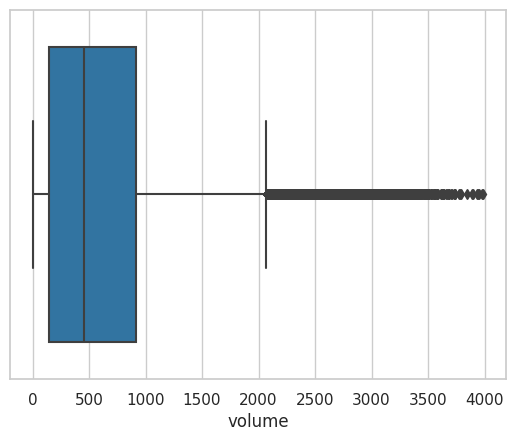

In [28]:
sns.boxplot(data=df, x='volume')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


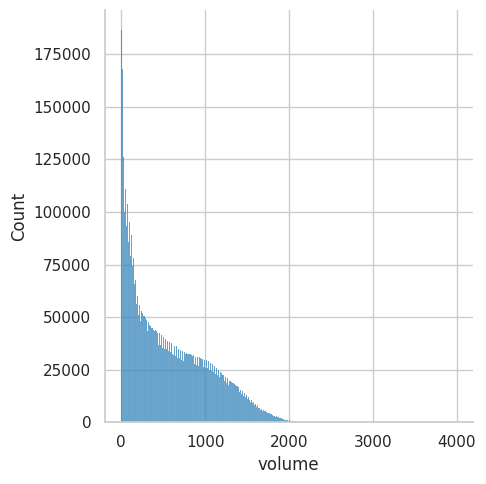

In [77]:
sns.displot(data=df, x='volume')
plt.show()

## Categorical Variables vs Volume

### Station ID

In [29]:
grouped_station = df.groupby('station_id')['volume'].agg('mean').reset_index().sort_values(by='volume', ascending=False)
grouped_station

,station_id,volume
15,10800,891.748487
21,11179,880.222907
4,405,849.598613
13,10730,794.144631
22,11191,792.511957
30,11283,785.564050
25,11228,768.043800
10,10310,757.164057
19,10899,727.295930
28,11273,667.924477


In [30]:
# Taking 3 stations, one with highest volume, one with lowest volume and one with average volume
mask = (grouped_station['volume'] == grouped_station['volume'].max())
station_max = grouped_station[mask]['station_id'].values[0]

mask = (grouped_station['volume'] == grouped_station['volume'].min())
station_min = grouped_station[mask]['station_id'].values[0]

median_value = grouped_station['volume'].median()
closest_value = grouped_station['volume'].iloc[(grouped_station['volume'] - median_value).abs().idxmin()]
mask = (grouped_station['volume'] == closest_value)
station_median = grouped_station[mask]['station_id'].values[0]

station_max, station_min, station_median

(10800, 425, 11726)

In [31]:
mask = df['station_id'].isin([station_max, station_min, station_median])
station_df = df[mask]
station_df.head()

,station_id,dir_of_travel,lane_of_travel,date,hour,volume,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),...,wdir,wspd,pres,is_holiday,day_of_week,day,week,month,year,datetime
43804,425,3,1,2020-01-01,1,130,36.0,13.0,0.00,0.0,...,183.0,14.8,998.5,1,2,1,1,1,2020,2020-01-01 01:00:00
43805,425,3,1,2020-01-02,1,27,37.0,31.0,0.00,0.0,...,272.0,19.1,1000.8,0,3,2,1,1,2020,2020-01-02 01:00:00
43806,425,3,1,2020-01-03,1,34,36.0,24.0,0.00,0.0,...,238.0,12.6,1011.7,0,4,3,1,1,2020,2020-01-03 01:00:00
43807,425,3,1,2020-01-04,1,56,30.0,24.0,0.00,0.0,...,226.0,15.9,1018.9,0,5,4,1,1,2020,2020-01-04 01:00:00
43808,425,3,1,2020-01-05,1,66,38.0,24.0,0.01,0.0,...,274.0,28.5,1014.9,0,6,5,1,1,2020,2020-01-05 01:00:00


In [32]:
station_df['station_id'].value_counts()

station_id
11726    280512
10800    210240
425      140260
Name: count, dtype: int64

In [33]:
station_df.dtypes

station_id                                  int64
dir_of_travel                               int64
lane_of_travel                              int64
date                                       object
hour                                        int64
volume                                      int64
Maximum Temperature degrees (F)           float64
Minimum Temperature degrees (F)           float64
Precipitation (inches)                    float64
Snow (inches)                             float64
Snow Depth (inches)                       float64
wdir                                      float64
wspd                                      float64
pres                                      float64
is_holiday                                  int64
day_of_week                                 int32
day                                         int32
week                                       UInt32
month                                       int32
year                                        int32


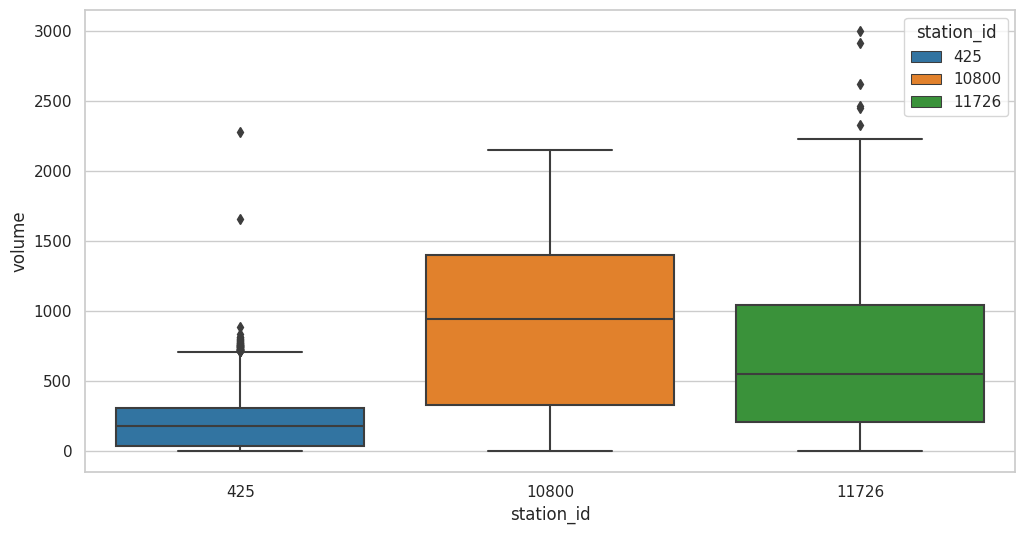

In [34]:
# Now plotting the distribution of volume for these 3 stations
plt.figure(figsize=(12, 6))
sns.boxplot(data=station_df, y='volume', x='station_id', hue='station_id', dodge=False)
plt.show()

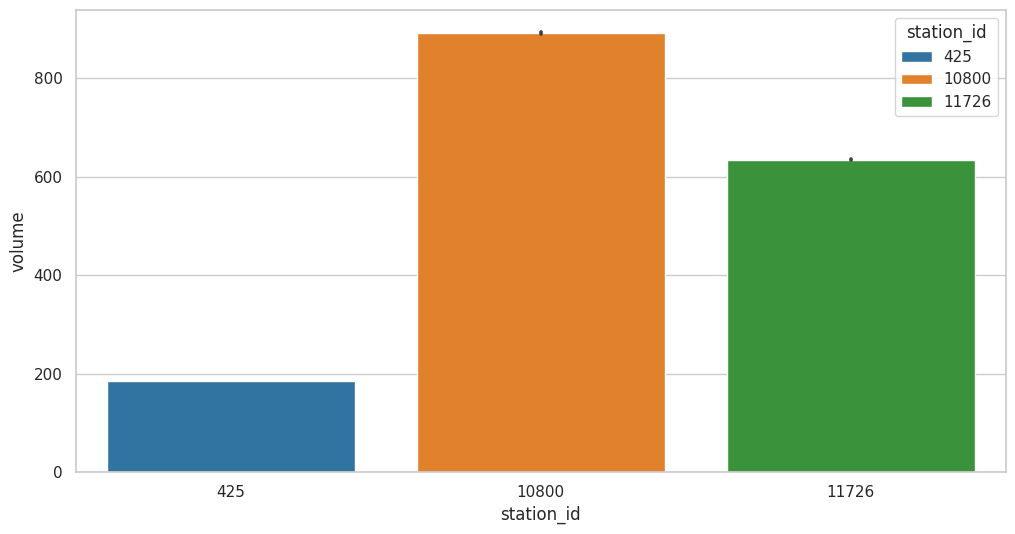

In [35]:
# Now plotting the distribution of volume for these 3 stations
plt.figure(figsize=(12, 6))
sns.barplot(data=station_df, y='volume', x='station_id', hue='station_id', dodge=False)
plt.show()

Seems that the stations have different volumes, thus each road has different traffic. This is a good feature to predict the traffic.

### Direction of Travel

In [36]:
df.dtypes

station_id                                  int64
dir_of_travel                               int64
lane_of_travel                              int64
date                                       object
hour                                        int64
volume                                      int64
Maximum Temperature degrees (F)           float64
Minimum Temperature degrees (F)           float64
Precipitation (inches)                    float64
Snow (inches)                             float64
Snow Depth (inches)                       float64
wdir                                      float64
wspd                                      float64
pres                                      float64
is_holiday                                  int64
day_of_week                                 int32
day                                         int32
week                                       UInt32
month                                       int32
year                                        int32


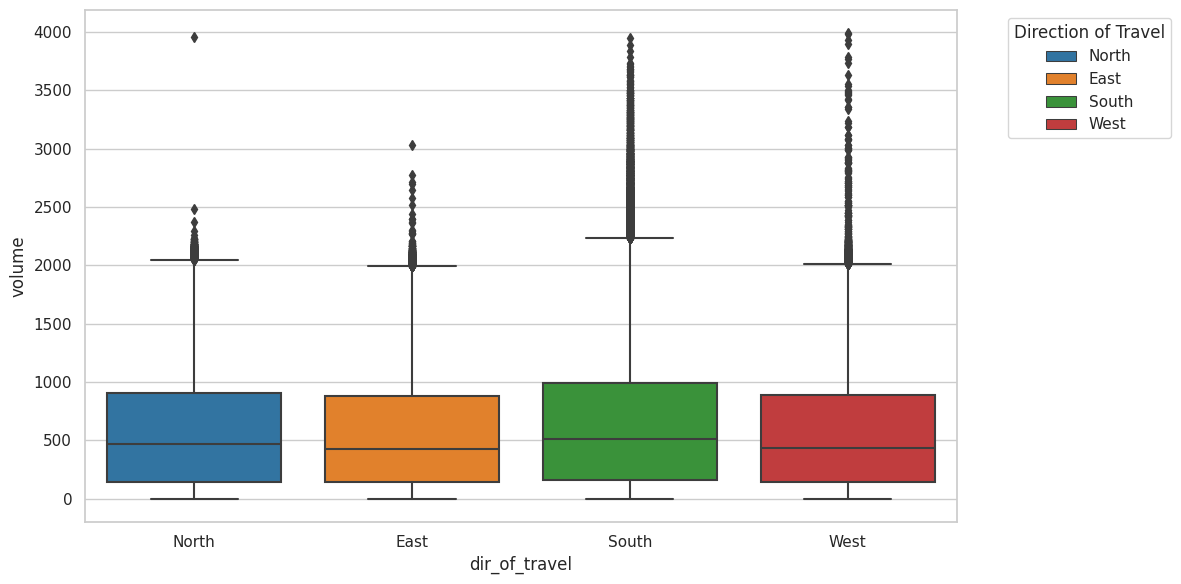

In [37]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, y='volume', x='dir_of_travel', hue='dir_of_travel', dodge=False)
plt.xticks(ticks=plt.xticks()[0], labels=['North', 'East', 'South', 'West'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['North', 'East', 'South', 'West'], title='Direction of Travel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

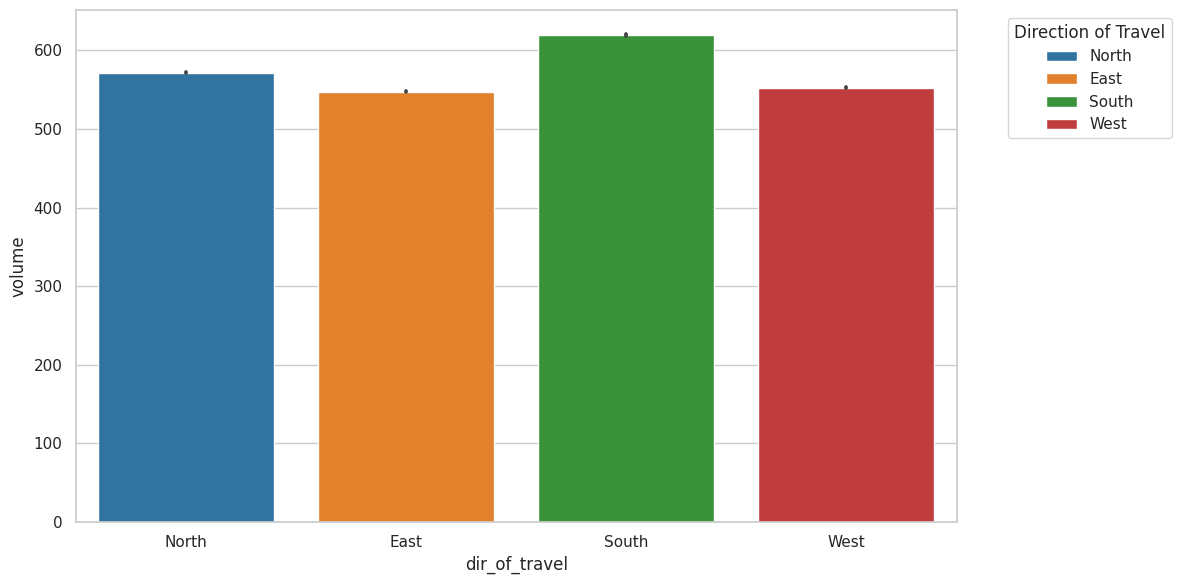

In [38]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, y='volume', x='dir_of_travel', hue='dir_of_travel', dodge=False)
plt.xticks(ticks=plt.xticks()[0], labels=['North', 'East', 'South', 'West'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['North', 'East', 'South', 'West'], title='Direction of Travel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Seems the direction affect the traffic volume a bit. This is a good feature to predict the traffic. As for 4 and 8 don't have as much traffic volume compared to the other 4 directions

### Lane of Travel

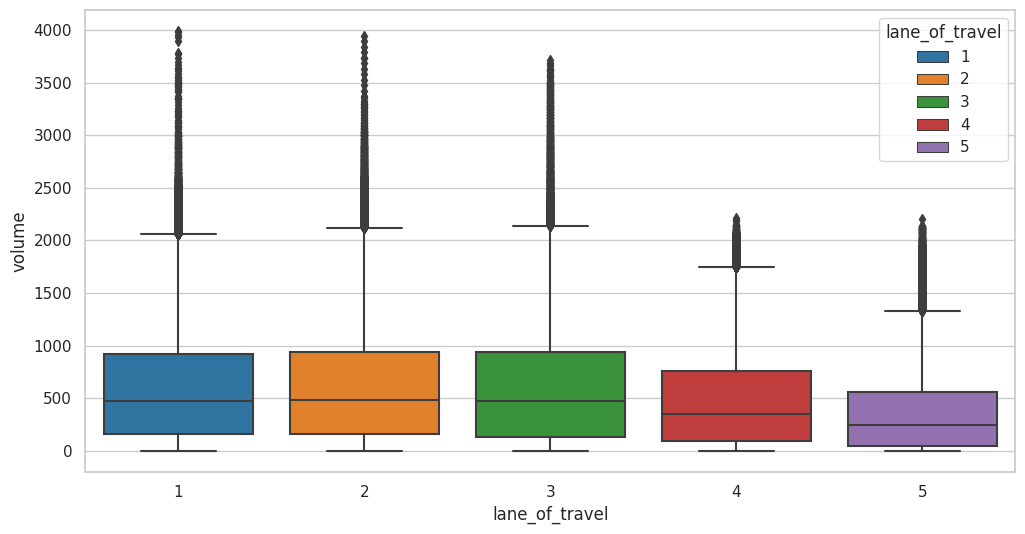

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='volume', x='lane_of_travel', hue='lane_of_travel', dodge=False)
plt.show()

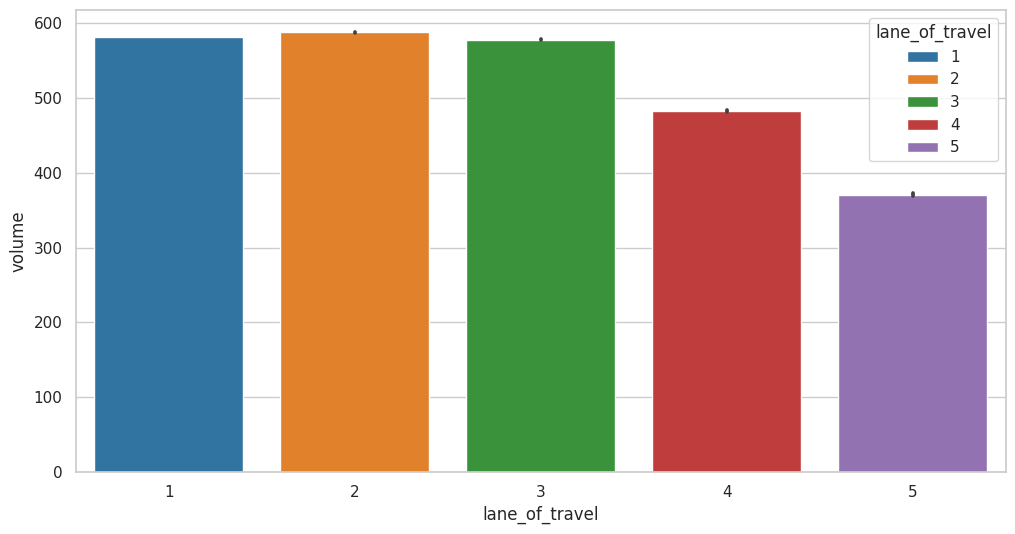

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, y='volume', x='lane_of_travel', hue='lane_of_travel', dodge=False)
plt.show()

Seems the lane of travel also affects the traffic volume. This is a good feature to predict the traffic. For example, lane 3 seems to have more consistent high traffic volume but lane 1 has the highest traffic volume recorded

### Is Holiday

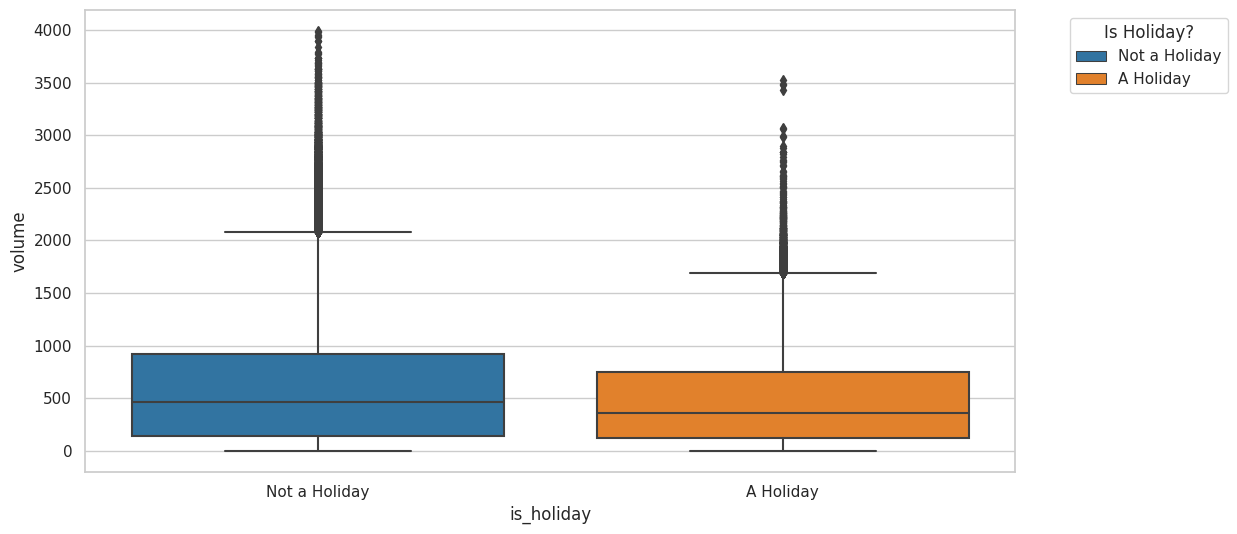

In [41]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, y='volume', x='is_holiday', hue='is_holiday', dodge=False)
plt.xticks(ticks=[0, 1], labels=['Not a Holiday', 'A Holiday'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Not a Holiday', 'A Holiday'], title='Is Holiday?', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

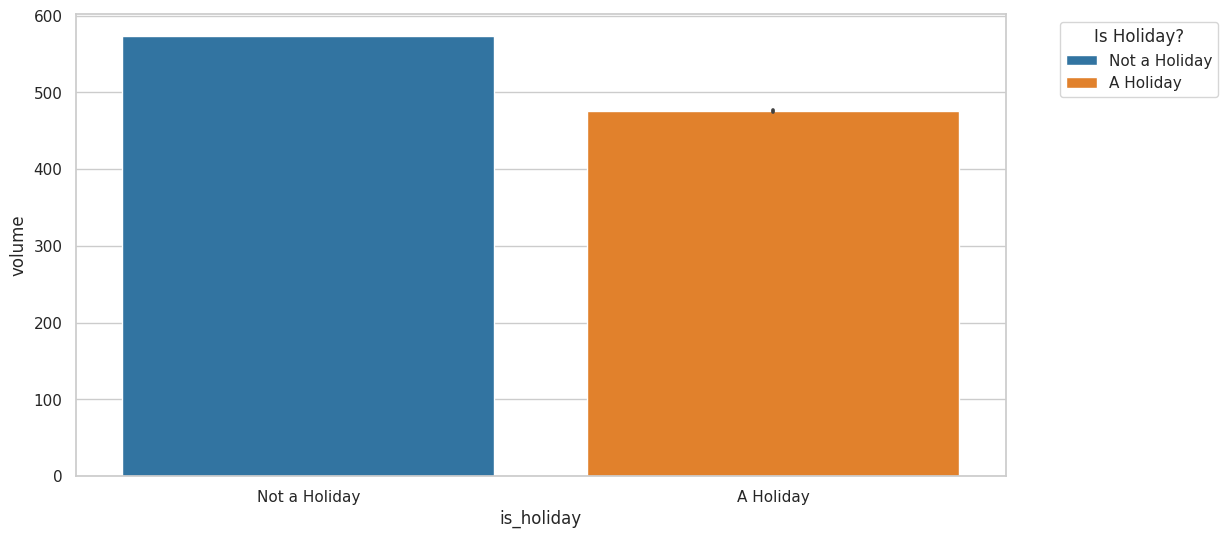

In [42]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, y='volume', x='is_holiday', hue='is_holiday', dodge=False)
plt.xticks(ticks=[0, 1], labels=['Not a Holiday', 'A Holiday'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Not a Holiday', 'A Holiday'], title='Is Holiday?', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Eventhough both seem to have same distribution, but the traffic seems to be higher on non-holidays. This is a good feature to predict the traffic

## Numerical Variables vs Volume

In [43]:
# Extracting the days, months and years
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year
df.dtypes

station_id                                  int64
dir_of_travel                               int64
lane_of_travel                              int64
date                                       object
hour                                        int64
volume                                      int64
Maximum Temperature degrees (F)           float64
Minimum Temperature degrees (F)           float64
Precipitation (inches)                    float64
Snow (inches)                             float64
Snow Depth (inches)                       float64
wdir                                      float64
wspd                                      float64
pres                                      float64
is_holiday                                  int64
day_of_week                                 int32
day                                         int32
week                                       UInt32
month                                       int32
year                                        int32


In [44]:
num_cols = list(df.select_dtypes(include=['int', 'float']).columns)
num_cols

['station_id',
 'dir_of_travel',
 'lane_of_travel',
 'hour',
 'volume',
 'Maximum Temperature degrees (F)',
 'Minimum Temperature degrees (F)',
 'Precipitation (inches)',
 'Snow (inches)',
 'Snow Depth (inches)',
 'wdir',
 'wspd',
 'pres',
 'is_holiday',
 'day_of_week',
 'day',
 'month',
 'year']

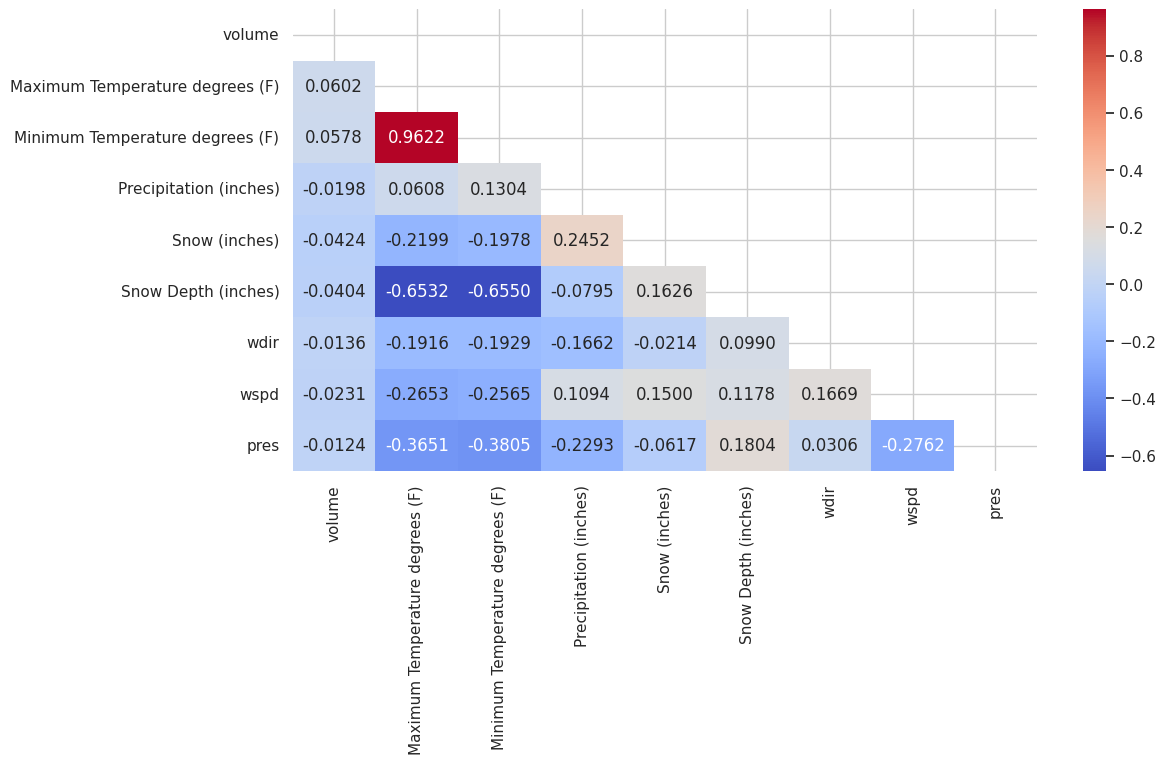

In [45]:
num_cols.remove('is_holiday')
num_cols.remove('hour')
num_cols.remove('day')
num_cols.remove('day_of_week')
num_cols.remove('month')
num_cols.remove('year')
num_cols.remove('station_id')
num_cols.remove('dir_of_travel')
num_cols.remove('lane_of_travel')

corr = df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 6))
sns.heatmap(corr, mask=mask, annot=True, fmt=".4f", cmap='coolwarm')
plt.show()

The correlation seem low, however there needs to be further analysis to see the relationship between the numerical variables and the volume

In [71]:
# Taking a sample so that the process is faster
mask = (df['year']<2023) & (df['station_id']==10800)
df[mask].shape

(210424, 21)

In [72]:
from sklearn.feature_selection import mutual_info_regression
num_cols.remove('volume')
mi = mutual_info_regression(df.loc[mask, num_cols], df.loc[mask, 'volume'])
mi

array([0.01133905, 0.01355782, 0.00944528, 0.00467716, 0.00740375,
       0.02130106, 0.01947209, 0.02152176])

In [73]:
pd.DataFrame(mi, index=num_cols)

,0
Maximum Temperature degrees (F),0.011339
Minimum Temperature degrees (F),0.013558
Precipitation (inches),0.009445
Snow (inches),0.004677
Snow Depth (inches),0.007404
wdir,0.021301
wspd,0.019472
pres,0.021522


In [78]:
from scipy.stats import shapiro, kstest, spearmanr

# Shapiro-Wilk Test
stat, p_value = shapiro(df['volume'])
print(f'Statistic: {stat}, p-value: {p_value}')

Statistic: 0.9179719769943916, p-value: 8.577133860562873e-158


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8098256.
  res = hypotest_fun_out(*samples, **kwds)


In [79]:
stat, p_value = shapiro(df['Precipitation (inches)'])
print(f'Statistic: {stat}, p-value: {p_value}')

Statistic: 0.9551596307990129, p-value: 9.124097269243656e-139


In [82]:
corr, p_value = spearmanr(df['Precipitation (inches)'], df['volume'])

print(f"Spearman rank correlation coefficient: {corr}, p-value: {p_value}")

Spearman rank correlation coefficient: -0.020657076590692172, p-value: 0.0


## Time vs Volume

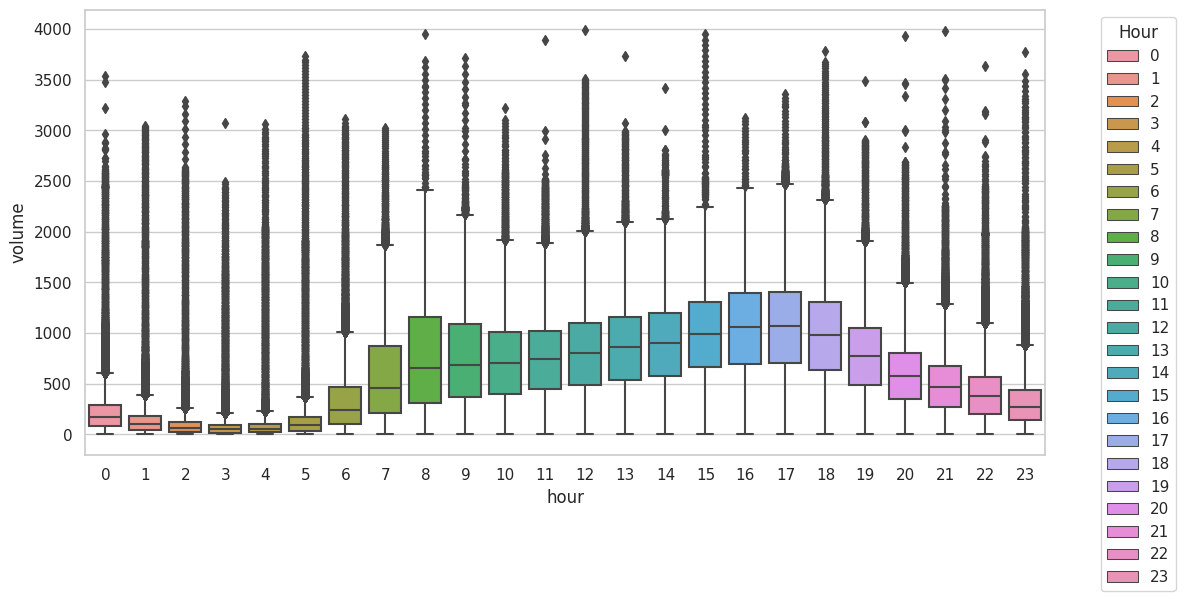

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='volume', x='hour', hue='hour', dodge=False)
plt.legend(title='Hour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


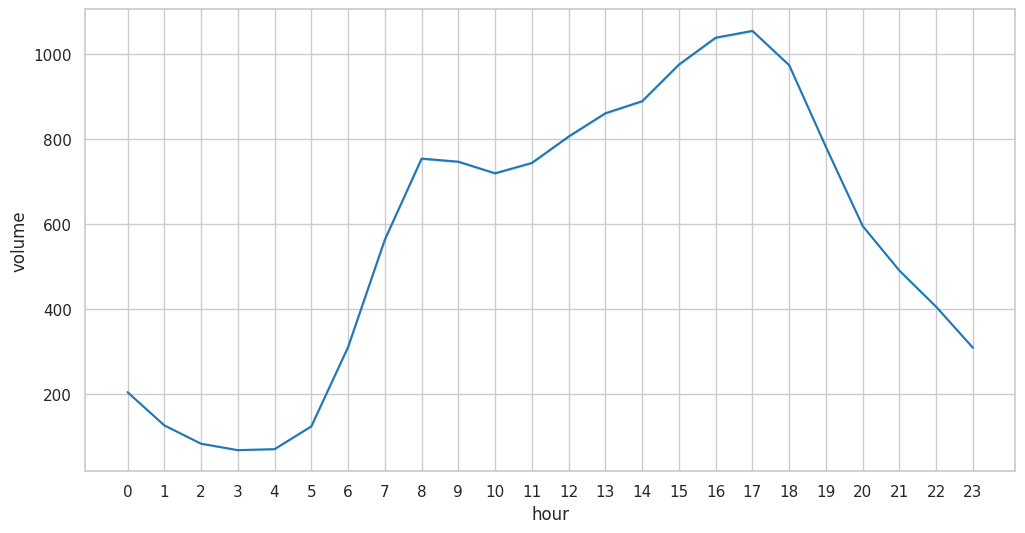

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, y='volume', x='hour')
plt.xticks(range(24))
plt.show()

In [52]:
df.head()

,station_id,dir_of_travel,lane_of_travel,date,hour,volume,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),...,wdir,wspd,pres,is_holiday,day_of_week,day,week,month,year,datetime
0,301,3,1,2020-01-02,1,135,37.0,31.0,0.00,0.0,...,272.0,19.1,1000.8,0,3,2,1,1,2020,2020-01-02 01:00:00
1,301,3,1,2020-01-03,1,164,36.0,24.0,0.00,0.0,...,238.0,12.6,1011.7,0,4,3,1,1,2020,2020-01-03 01:00:00
2,301,3,1,2020-01-04,1,291,30.0,24.0,0.00,0.0,...,226.0,15.9,1018.9,0,5,4,1,1,2020,2020-01-04 01:00:00
3,301,3,1,2020-01-05,1,281,38.0,24.0,0.01,0.0,...,274.0,28.5,1014.9,0,6,5,1,1,2020,2020-01-05 01:00:00
4,301,3,1,2020-01-06,1,146,36.0,22.0,0.00,0.0,...,231.0,18.2,1019.3,0,0,6,2,1,2020,2020-01-06 01:00:00


In [53]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

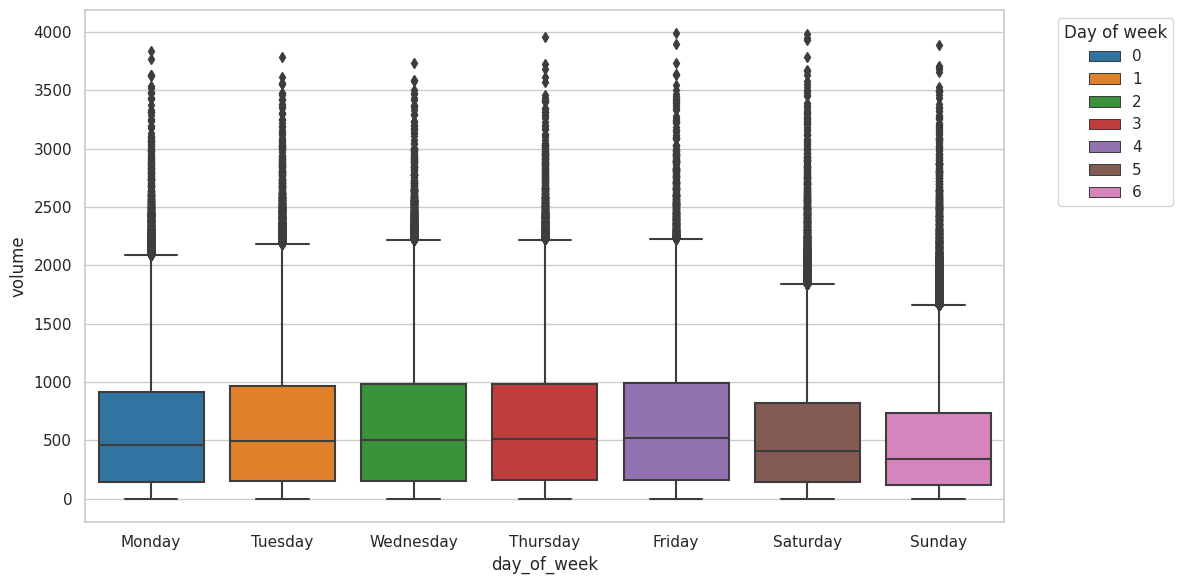

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='volume', x='day_of_week', hue='day_of_week', dodge=False)
plt.legend(title='Day of week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(7), labels=days_of_week)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


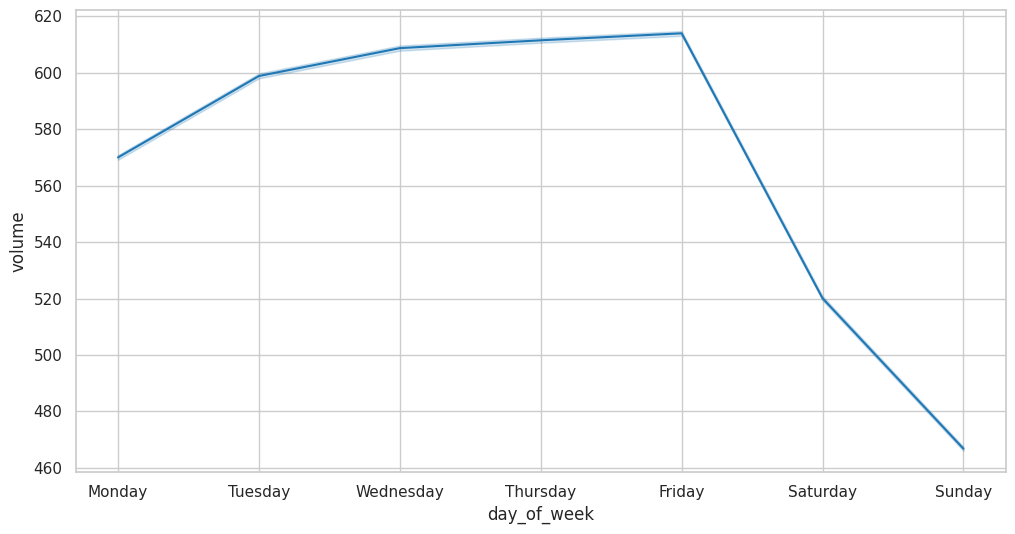

In [55]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, y='volume', x='day_of_week')
plt.xticks(ticks=range(7), labels=days_of_week)
plt.show()

In [56]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

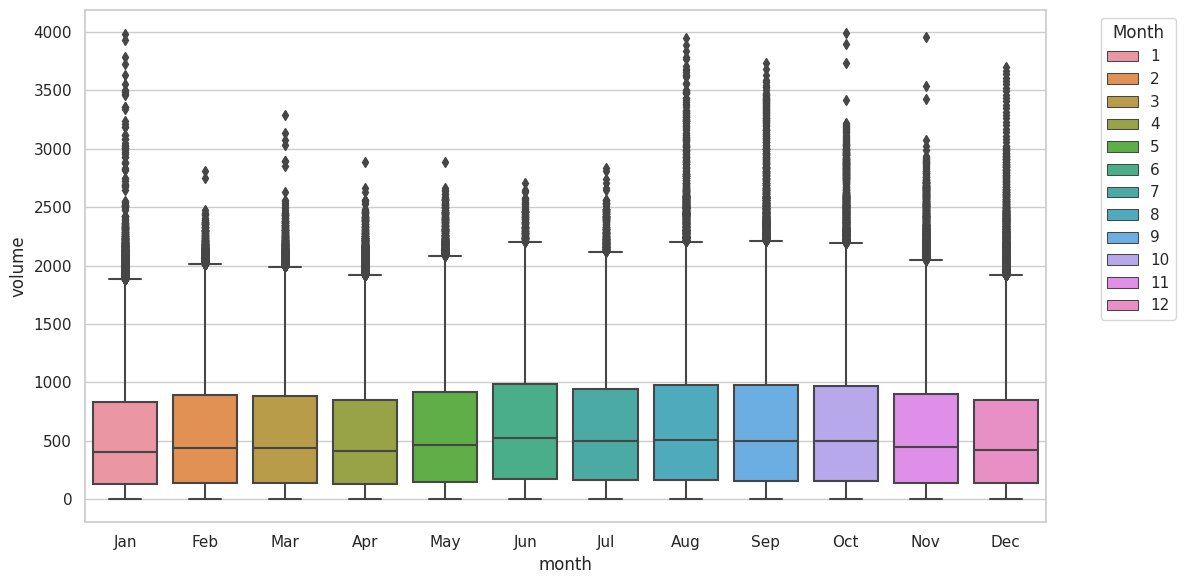

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='volume', x='month', hue='month', dodge=False)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(12), labels=months)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


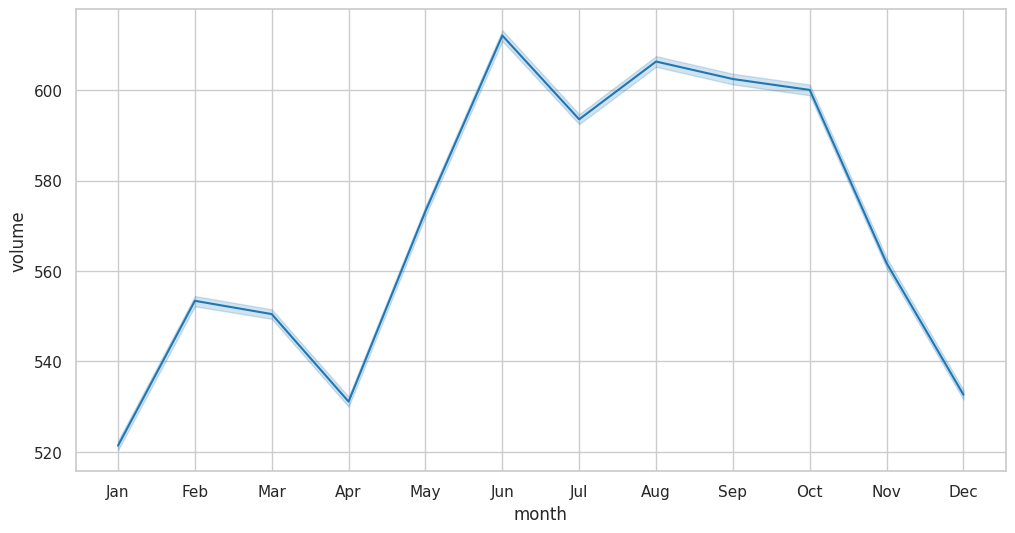

In [58]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, y='volume', x='month')
plt.xticks(ticks=range(1, 13), labels=months)
plt.show()

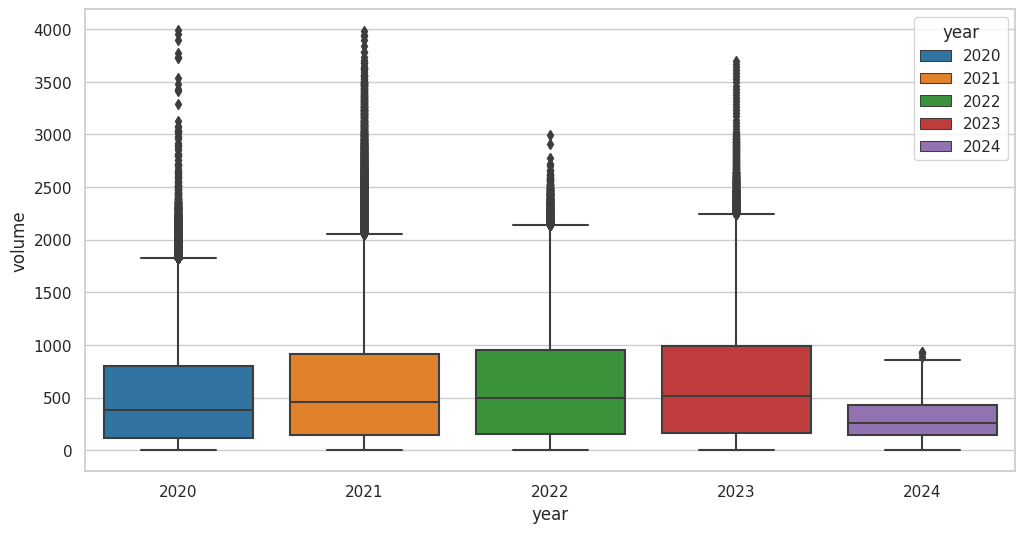

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='volume', x='year', hue='year', dodge=False)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


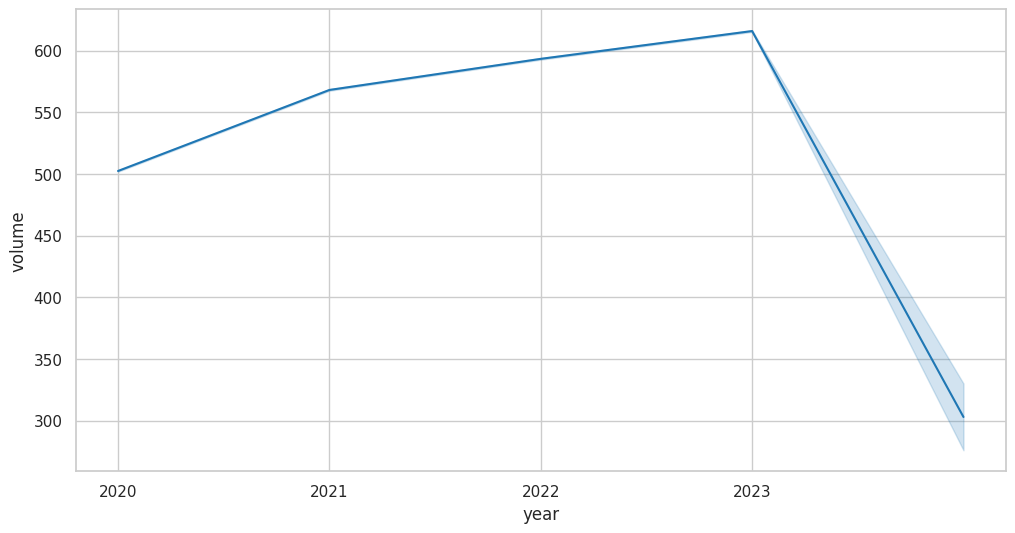

In [60]:
plt.figure(figsize=(12, 6))
mask = df['year'] != 2024
sns.lineplot(data=df, y='volume', x='year')
plt.xticks(range(2020, 2024))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


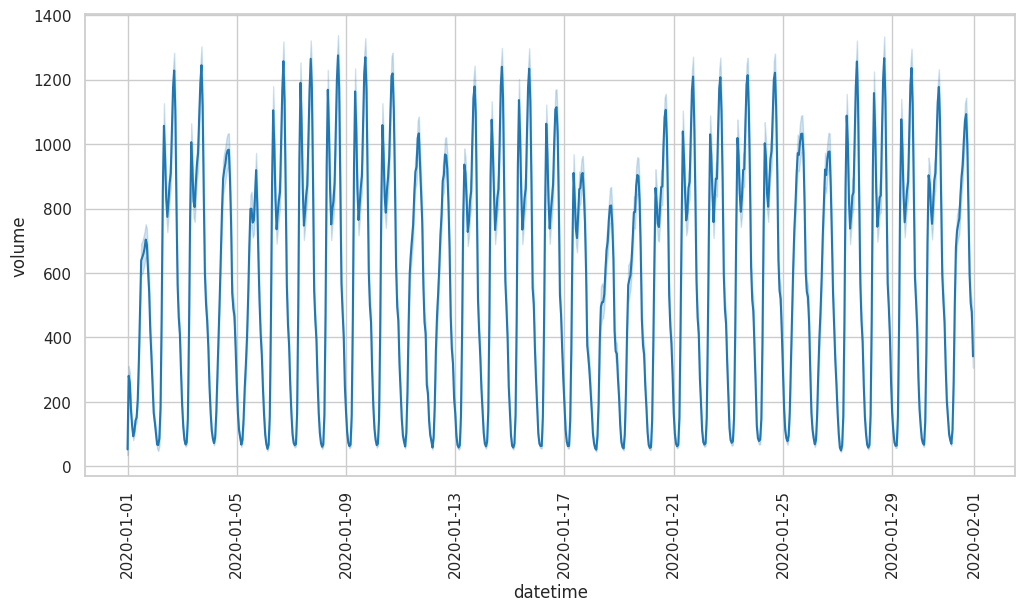

In [61]:
mask = (df['year'] == 2020) & (df['month'] == 1) 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[mask], x='datetime', y='volume')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


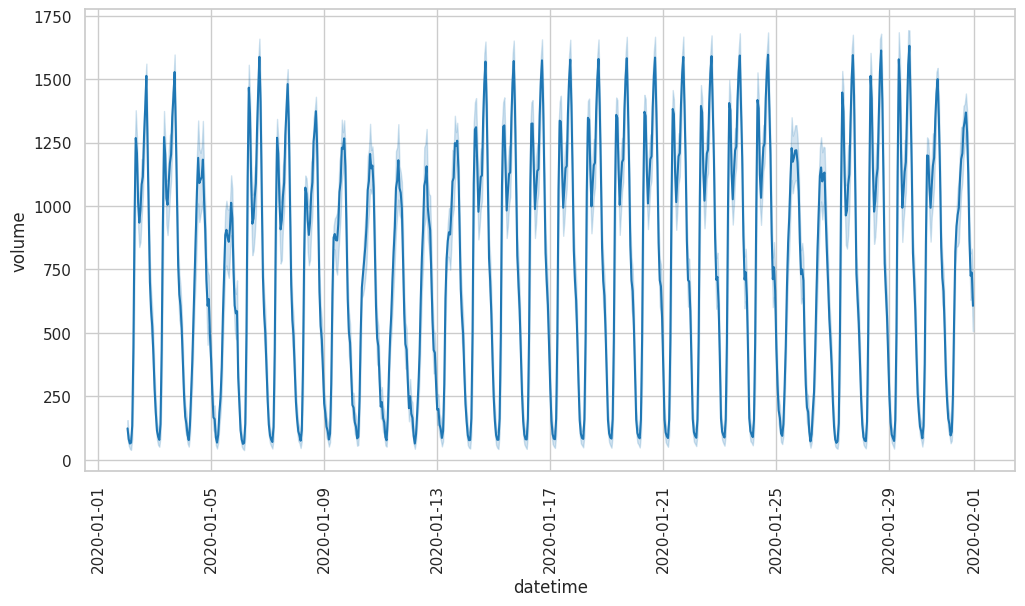

In [62]:
mask = mask & (df['station_id']==301)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[mask], x='datetime', y='volume')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


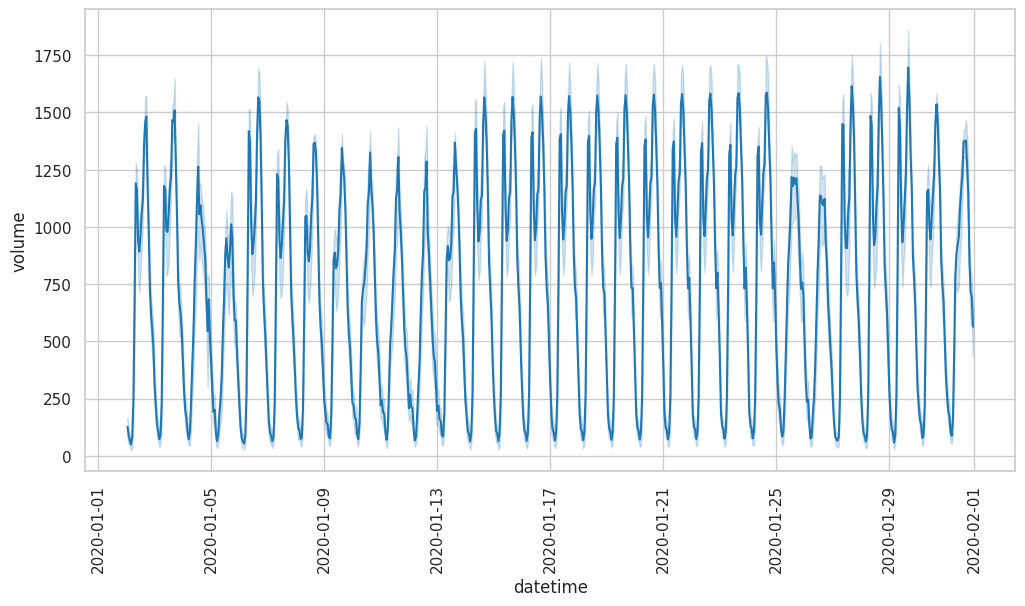

In [63]:
mask = mask & (df['dir_of_travel']==3)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[mask], x='datetime', y='volume')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


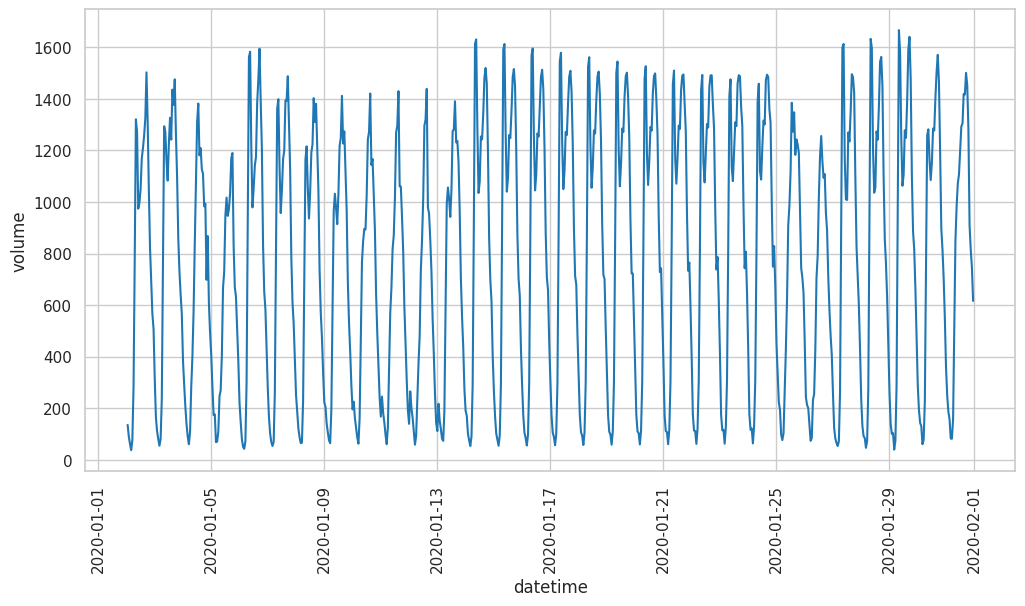

In [64]:
mask = mask & (df['lane_of_travel']==1)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[mask], x='datetime', y='volume')
plt.xticks(rotation=90)
plt.show()

# Looking at the variance of the data

In [83]:
from sklearn.decomposition import PCA

num_cols = list(df.select_dtypes(include=['int', 'float']).columns)
num_cols.remove('is_holiday')
num_cols.remove('hour')
num_cols.remove('day')
num_cols.remove('day_of_week')
num_cols.remove('month')
num_cols.remove('year')
num_cols.remove('station_id')
num_cols.remove('dir_of_travel')
num_cols.remove('lane_of_travel')
num_cols.remove('volume')

pca = PCA()
pca.fit(df[num_cols])

pca.explained_variance_ratio_

array([8.92419048e-01, 9.63998356e-02, 6.20542339e-03, 2.52326775e-03,
       1.88101054e-03, 5.12375373e-04, 5.52424083e-05, 3.79646872e-06])

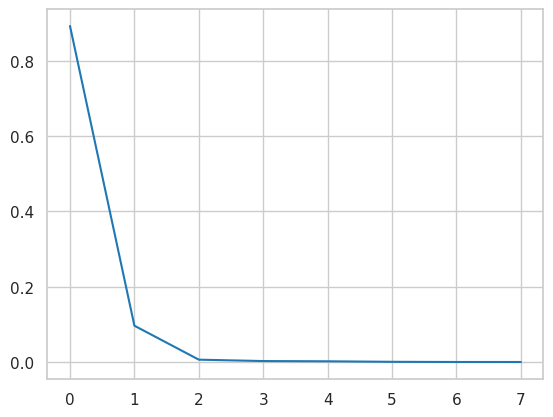

In [84]:
plt.plot(pca.explained_variance_ratio_)
plt.show()